In [ ]:
###1. 토픽 모델링 작업

###토픽을 추출은 어느 텍스트나 상관성이 없음. 다만 perplexity를 추출해서 몇 개의 토픽을 추출해야 하는지는 보여줘야 함.



# 위스키 리뷰로 진행

# LDA 토픽 모델링

## Scikit Learn을 활용한 LDA 방식

In [4]:
import pandas as pd

df = pd.read_csv('/Users/helloworld/Desktop/TM_finalHW/scotch_review.csv')

In [5]:
df.head()

,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


In [6]:
unique_categories = df['category'].unique()
print(unique_categories)

['Blended Scotch Whisky' 'Single Malt Scotch' 'Blended Malt Scotch Whisky'
 'Grain Scotch Whisky' 'Single Grain Whisky']


In [8]:
whisky_category = ['Blended Scotch Whisky', 'Single Malt Scotch', 'Blended Malt Scotch Whisky',
              'Grain Scotch Whisky', 'Single Grain Whisky']  # 쉼표 추가

# 카테고리에 따라 데이터 필터링
whisky_groups_train = df[df['category'].isin(whisky_category)]

# 필터링된 데이터셋의 크기와 카테고리 출력
print('#Train set size:', len(whisky_groups_train))
print('#Selected category:', whisky_category)


#Train set size: 2247
#Selected category: ['Blended Scotch Whisky', 'Single Malt Scotch', 'Blended Malt Scotch Whisky', 'Grain Scotch Whisky', 'Single Grain Whisky']


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer 객체 생성 및 벡터화 수행
cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', 
                     max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(whisky_groups_train['description'])


In [18]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수
                                max_iter=5, 
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='online', 
                                n_jobs= -1, #사용 processor 수
                                random_state=0)

review_topics = lda.fit_transform(review_cv)
print('#shape of review_topics:', review_topics.shape)
print('#Sample of review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
print('#Sum of topic weights of documents:', gross_topic_weights)

print('#shape of topic word distribution:', lda.components_.shape)

#shape of review_topics: (2247, 10)
#Sample of review_topics: [0.021 0.032 0.023 0.037 0.034 0.408 0.35  0.023 0.035 0.037]
#Sum of topic weights of documents: [0.075 0.104 0.109 0.079 0.065 0.077 0.078 0.208 0.126 0.078]
#shape of topic word distribution: (10, 2000)


In [19]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print_top_words(lda, cv.get_feature_names_out(), 10)


Topic #0: whisky, malt, distillery, fresh, light, grass, vanilla, cut, hay, just
Topic #1: old, year, whisky, notes, fruit, oak, vanilla, spice, sherry, polished
Topic #2: notes, whisky, fruit, flavors, color, vanilla, nicely, dry, aroma, gold
Topic #3: sherry, cask, dark, chocolate, leather, big, rich, mix, whisky, it's
Topic #4: fruit, sweetness, notes, citrus, whisky, barley, mint, distillery, glen, ripe
Topic #5: smoke, whisky, peat, notes, smoky, sweet, pepper, caol, ila, like
Topic #6: lemon, orange, ginger, honey, peel, sugar, sweet, spices, oak, aromas
Topic #7: nose, sherry, oak, casks, chocolate, matured, spicy, sweet, bottles, bourbon
Topic #8: water, sweet, fruits, little, light, note, like, nose, apple, slightly
Topic #9: vanilla, malt, honey, spice, wood, dry, gentle, spices, orange, floral



# 혼잡도 및 응집도 계산

### 토픽모델링에서 가장 중요한 것은 하이퍼 파라미터를 결정하는 것으로 토픽의 갯수이다. 토픽 수를 결정하기 위해서는 다양한 토픽 수를 적용한 모형들에 대해서 혼잡도(perplexity)와 토픽 응집도를 계산해야 한다.

n_components: 6, perplexity: 905.234
n_components: 7, perplexity: 944.026
n_components: 8, perplexity: 971.341
n_components: 9, perplexity: 1013.752
n_components: 10, perplexity: 1057.910
n_components: 11, perplexity: 1099.738
n_components: 12, perplexity: 1140.270
n_components: 13, perplexity: 1188.168
n_components: 14, perplexity: 1241.728
n_components: 15, perplexity: 1284.653


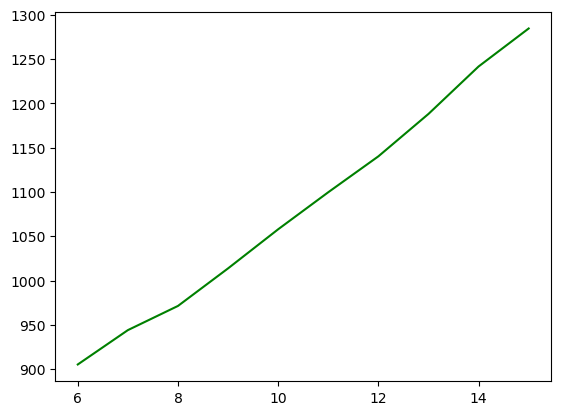

n_components with minimum perplexity: 6


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# 퍼플렉서티 계산 및 시각화 함수
def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1, doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components=i, max_iter=max_iter, 
                                        topic_word_prior=topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs=-1,
                                        random_state=7)    
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

# 최적의 n_components 찾기
optimal_n_components = show_perplexity(review_cv, start=6, end=15)
print("n_components with minimum perplexity:", optimal_n_components)


In [58]:
lda = LatentDirichletAllocation(n_components = 6, #추출할 topic의 수를 지정
                                max_iter=20, 
                                topic_word_prior= 0.1, 
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1, 
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: water, fruits, smoke, like, distillery, little, light, note, sweet, shows
Topic #1: sherry, chocolate, casks, oak, bourbon, nose, matured, notes, dark, spicy
Topic #2: whisky, old, year, fruit, smoke, notes, peat, toffee, whiskies, like
Topic #3: nose, malt, sweet, peat, bottles, spicy, pepper, single, ginger, smoke
Topic #4: orange, apple, sweet, spices, lemon, nose, blend, peel, chocolate, spice
Topic #5: vanilla, notes, fruit, whisky, honey, oak, creamy, dry, malt, soft


## Gensim 모듈을 활용한 토픽 모델링

In [8]:
!pip3 install --upgrade gensim

Defaulting to user installation because normal site-packages is not writeable


In [25]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# 데이터 로드
df = pd.read_csv('/Users/helloworld/Desktop/TM_finalHW/scotch_review.csv')

# NLTK의 정규표현식 토크나이저와 불용어 리스트를 사용
RegTok = RegexpTokenizer("[\w']{3,}")  # 정규표현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english'))  # 영어 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) 
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    return words

# df['description'] 컬럼을 사용해 토큰화 수행
texts = [tokenizer(desc) for desc in df['description']]


In [26]:
texts

[['magnificently',
  'powerful',
  'intense',
  'caramels',
  'dried',
  'peats',
  'elegant',
  'cigar',
  'smoke',
  'seeds',
  'scraped',
  'vanilla',
  'beans',
  'brand',
  'new',
  'pencils',
  'peppercorn',
  'coriander',
  'seeds',
  'star',
  'anise',
  'make',
  'deeply',
  'satisfying',
  'nosing',
  'experience',
  'silky',
  'caramels',
  'bountiful',
  'fruits',
  'ripe',
  'peach',
  'stewed',
  'apple',
  'orange',
  'pith',
  'pervasive',
  'smoke',
  'elements',
  'burnt',
  'tobacco',
  'abiding',
  'finish',
  'smoke',
  'dry',
  'spices',
  'banoffee',
  'pie',
  'sweetness',
  'close',
  'perfection',
  "editor's",
  'choice'],
 ['impresses',
  'whisky',
  'evolves',
  'incredibly',
  'complex',
  'nose',
  'palate',
  'thick',
  'viscous',
  'whisky',
  'notes',
  'sticky',
  'toffee',
  'earthy',
  'oak',
  'fig',
  'cake',
  'roasted',
  'nuts',
  'fallen',
  'fruit',
  'pancake',
  'batter',
  'black',
  'cherry',
  'ripe',
  'peach',
  'dark',
  'chocolate',


In [27]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 8874
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 2247


In [28]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

CPU times: user 4.46 s, sys: 18.7 ms, total: 4.48 s
Wall time: 4.58 s


In [29]:
model.print_topics(num_words=10)

[(0,
  '0.030*"sherry" + 0.026*"nose" + 0.023*"oak" + 0.021*"chocolate" + 0.014*"spices" + 0.013*"spicy" + 0.013*"matured" + 0.012*"black" + 0.012*"vanilla" + 0.011*"cask"'),
 (1,
  '0.028*"like" + 0.025*"smoke" + 0.020*"water" + 0.015*"light" + 0.012*"distillery" + 0.011*"cask" + 0.010*"note" + 0.009*"character" + 0.008*"tongue" + 0.008*"nose"'),
 (2,
  '0.017*"light" + 0.016*"sweet" + 0.014*"malt" + 0.013*"nose" + 0.013*"notes" + 0.013*"orange" + 0.012*"vanilla" + 0.011*"grain" + 0.011*"honey" + 0.010*"old"'),
 (3,
  '0.012*"sweet" + 0.012*"water" + 0.012*"distillery" + 0.010*"light" + 0.010*"spice" + 0.010*"another" + 0.009*"notes" + 0.009*"like" + 0.009*"fresh" + 0.008*"age"'),
 (4,
  '0.022*"notes" + 0.021*"nose" + 0.020*"vanilla" + 0.017*"fruit" + 0.016*"malt" + 0.014*"spicy" + 0.014*"whisky" + 0.013*"citrus" + 0.012*"oak" + 0.012*"hint"'),
 (5,
  '0.020*"whisky" + 0.019*"notes" + 0.015*"fruit" + 0.012*"vanilla" + 0.010*"spice" + 0.010*"smoke" + 0.009*"sweet" + 0.009*"like" + 0.0

In [30]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(2, 0.15827869), (5, 0.6265539), (8, 0.19960007)]


In [31]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.9475690588710155


num_topics: 6, perplexity: -6.941, coherence: -1.686
num_topics: 7, perplexity: -6.968, coherence: -1.647
num_topics: 8, perplexity: -7.008, coherence: -1.776
num_topics: 9, perplexity: -7.025, coherence: -1.956
num_topics: 10, perplexity: -7.057, coherence: -1.850
num_topics: 11, perplexity: -7.087, coherence: -1.890
num_topics: 12, perplexity: -7.114, coherence: -2.020
num_topics: 13, perplexity: -7.145, coherence: -2.350
num_topics: 14, perplexity: -7.178, coherence: -2.420
num_topics: 15, perplexity: -7.200, coherence: -2.780


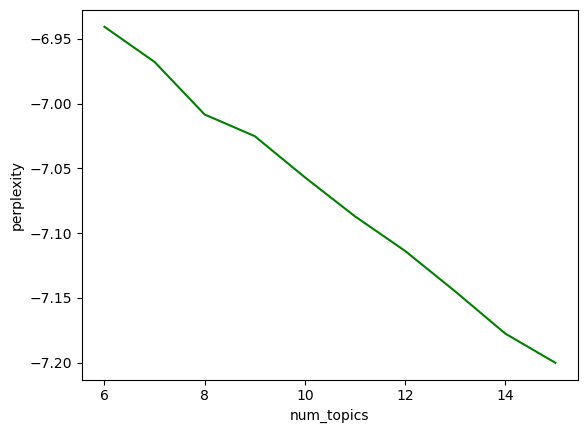

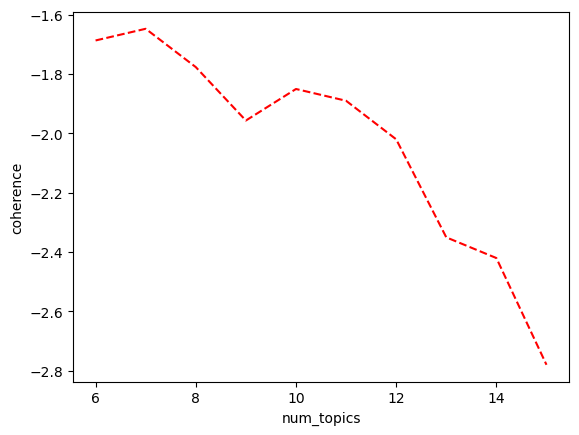

Optimal num_topics with maximum coherence: 7


In [59]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    optimal_num_topics = None
    max_coherence = float('-inf')  # 초기값으로 음수 무한대 설정

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')
        
        # 최적 토픽 수를 찾기 위한 조건
        if cv > max_coherence:
            max_coherence = cv
            optimal_num_topics = i

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

    print("Optimal num_topics with maximum coherence:", optimal_num_topics)

show_coherence(corpus, dictionary, start=6, end=15)


#  국민청원 데이터셋으로 진행

In [44]:
import pandas as pd

df = pd.read_json("/Users/helloworld/Desktop/TM_finalHW/public.txt", lines=True)
df.iloc[[2]]


,category,begin,end,content,num_agree,petition_idx,status,title
2,정치개혁,2018-05-01,2018-05-31,"대한민국 헌법학자들은 정당의 해산에 대해서 이렇게 말하고 있습니다. "" 위헌정당해산...",245,216514,청원종료,자유한국당 정당해산 만이 이 나라의 살 길입니다.


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twit = Okt()

In [49]:
def tokenizer(doc):
    return [token for token in twit.nouns(doc) if len(token) > 1]

In [47]:
vec = CountVectorizer(tokenizer=tokenizer, #우선은 명사만 사용
                      max_df=0.5, min_df = 5, 
                      max_features = 1000) #적당한 대상 단어 수를 선택

pet_cv = vec.fit_transform(df.content)

/Users/helloworld/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [50]:
pet_cv.shape

(25276, 1000)

In [51]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 15, \
                                n_jobs= -1, \
                                random_state=0)

%time pet_topics = lda.fit_transform(pet_cv)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] 
                         for i in topic.argsort()[:-n_top_words - 1:-1]]))
#print_top_words(lda,vec.get_feature_names(), 15)

CPU times: user 2.09 s, sys: 356 ms, total: 2.45 s
Wall time: 20.9 s


In [55]:
trend_data = pd.DataFrame(pet_topics, columns=['Topic'+str(i) for i in range(1, 16)])
trend_data = pd.concat([trend_data, df.end.map(lambda x: x[:7])], axis=1)
trend_data.iloc[:5, -5:]

,Topic12,Topic13,Topic14,Topic15,end
0,0.000889,0.115645,0.000889,0.196369,2018-05
1,0.004762,0.451427,0.263594,0.004762,2018-05
2,0.000529,0.000529,0.102855,0.000529,2018-05
3,0.000641,0.000641,0.000641,0.000641,2018-05
4,0.000248,0.000248,0.000248,0.000248,2018-05


In [56]:
trend = trend_data.groupby(['end']).mean()
trend.iloc[:5, -5:]

,Topic11,Topic12,Topic13,Topic14,Topic15
end,,,,,
2018-05,0.021841,0.077107,0.068685,0.031302,0.071726
2018-06,0.025974,0.060288,0.083232,0.030623,0.061379


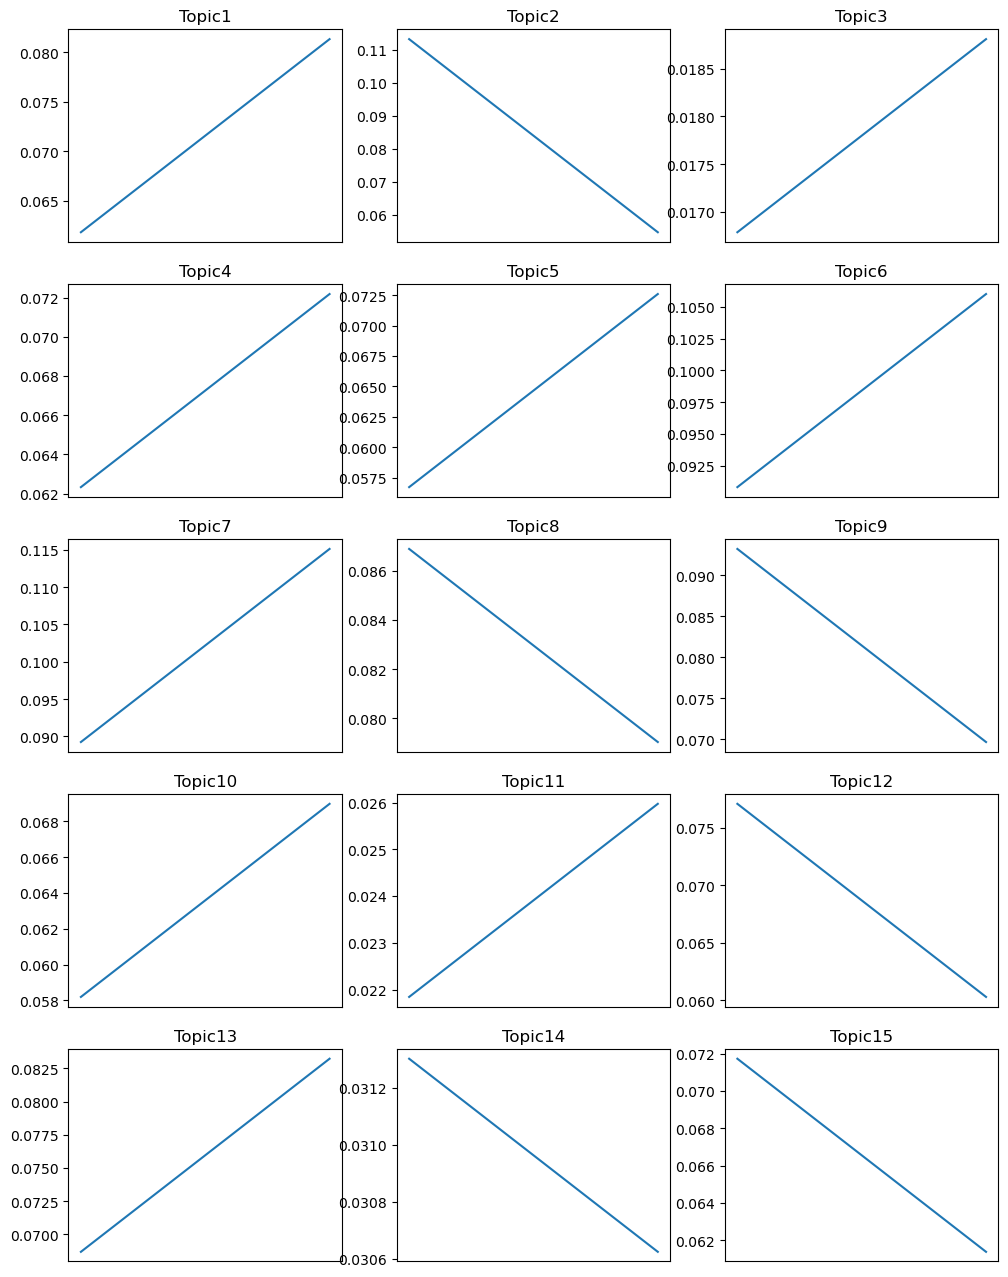

In [57]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(5, 3, sharex='col', figsize=(12, 16)) 
for col, ax in zip(trend.columns.tolist(), axes.ravel()): 
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show()